**Савельев Алексей** ИУ5-64б **Вариант №14**

# Рубежный контроль №2

Необходимо подготовить отчет по рубежному контролю и разместить его в Вашем репозитории. Вы можете использовать титульный лист, или в начале ноутбука в текстовой ячейке указать Ваши Ф.И.О. и группу.

**Тема: Методы построения моделей машинного обучения.**

## Задание
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

При решении задач можно выбирать любое подмножество признаков из приведенного набора данных.
Для сокращения времени построения моделей можно использовать фрагмент набора данных (например, первые 200-500 строк).

**Метод 1**: Линейная/логистическая регрессия **Метод 2**: Градиентный бустинг



### Разбивка столбцов

**Идентификация**  
PRIMARY_KEY: комбинация года и названия штата.  
YEAR  
STATE  

**Зачисление**  
Разбивка учащихся, обучающихся в школах, по учебным годам.  

GRADES_PK: Количество учащихся в дошкольном образовании.  
GRADES_4: Количество учащихся в четвертом классе.  
GRADES_8: Количество учащихся в восьмом классе.  
GRADES_12: Количество учащихся в двенадцатом классе.  
GRADES_1_8: Количество учащихся с первого по восьмой классы.  
9_12 КЛАССЫ: Количество учащихся с девятого по двенадцатый классы.  
GRADES_ALL: количество всех студентов в штате. Сопоставимо с ЗАЧИСЛЕНИЕМ в финансовые данные (что является США).  
Оценка Бюро переписи населения для студентов в штате).  
Расширенная версия states_all содержит дополнительные столбцы с разбивкой регистрации по расе и полу.  
Например:  

G06_A_A: Общее количество учащихся шестого класса.  
G06_AS_M: Число учащихся шестого класса мужского пола, этническая принадлежность которых была классифицирована как "азиатская".  
G08_AS_A_READING: Средний балл по чтению учащихся восьмого класса, этническая принадлежность которых была классифицирована как "азиатская".  
Представленные расы включают AM (американский индеец или уроженец Аляски), AS (азиат), HI (латиноамериканец/латиноамериканец), BL (Черный или афроамериканец), WH (Белый), HP (уроженец Гавайев/Тихоокеанских островов) и TR (Две или более рас). К представленным полам относятся M (Мужчина) и F (Женщина).  

**Финансовые показатели**  
Разбивка штатов по доходам и расходам.  

ENROLL: Данные Бюро переписи населения США о количестве студентов в штате. Должно быть сопоставимо с GRADES_ALL (что является оценкой NCES для студентов в штате).  
TOTAL REVENUE: общая сумма доходов для государства.  

FEDERAL_REVENUE  
STATE_REVENUE  
LOCAL_REVENUE  
TOTAL_EXPENDITURE: общие расходы государства.  

INSTRUCTION_EXPENDITURE  
SUPPORT_SERVICES_EXPENDITURE  
CAPITAL_OUTLAY_EXPENDITURE  
OTHER_EXPENDITURE  

**Академические Достижения**  
Разбивка успеваемости учащихся по результатам соответствующих экзаменов (математика и чтение, 4 и 8 классы).  

AVG_MATH_4_SCORE: средний балл по штату для четвероклассников, сдающих экзамен по математике NAEP.  
AVG_MATH_8_SCORE: средний балл штата для восьмиклассников, сдающих экзамен по математике NAEP.  
AVG_READING_4_SCORE: средний балл по штату для четвероклассников, сдающих экзамен по чтению NAEP.  
AVG_READING_8_SCORE: средний балл по штату для восьмиклассников, сдающих экзамен по чтению NAEP.  

In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint as ri
%matplotlib inline 
sns.set(style="ticks")

In [5]:
# читаем данные набора
data = pd.read_csv('/Users/savelevaa/JupyterNotebooks/data/rk2_data.csv', sep=",")

In [6]:
data.shape

(1715, 25)

In [8]:
data.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [7]:
# суммы пропусков по столбцам
data.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [9]:
data.head(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Рассмотрим корреляцию признаков набора данных

<AxesSubplot:>

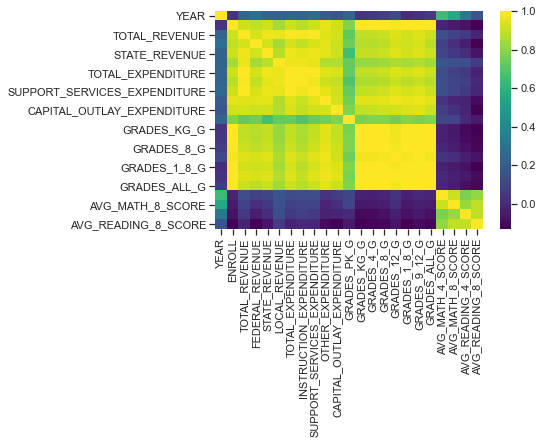

In [12]:
import seaborn as sns

sns.heatmap(data.corr(), cmap='viridis', fmt='.2f')

Признак TOTAL_EXPENDITURE достаточно сильно коррелирует с признаком TOTAL_REVENUE, поэтому рассмотрим эту пару.

In [26]:
# удалим строки с пропущенными значениями
data = data[data['TOTAL_EXPENDITURE'].notna()]
data = data[data['TOTAL_REVENUE'].notna()]

# суммы пропусков по столбцам
data.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                           51
TOTAL_REVENUE                     0
FEDERAL_REVENUE                   0
STATE_REVENUE                     0
LOCAL_REVENUE                     0
TOTAL_EXPENDITURE                 0
INSTRUCTION_EXPENDITURE           0
SUPPORT_SERVICES_EXPENDITURE      0
OTHER_EXPENDITURE                51
CAPITAL_OUTLAY_EXPENDITURE        0
GRADES_PK_G                      13
GRADES_KG_G                       0
GRADES_4_G                        0
GRADES_8_G                        0
GRADES_12_G                       0
GRADES_1_8_G                    255
GRADES_9_12_G                   255
GRADES_ALL_G                      0
AVG_MATH_4_SCORE                835
AVG_MATH_8_SCORE                836
AVG_READING_4_SCORE             752
AVG_READING_8_SCORE             839
dtype: int64

## Разделим датасет на обучающую и тестовую выборки
Для этого импортируем и используем метод train_test_split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data['TOTAL_EXPENDITURE'].values, data['TOTAL_REVENUE'].values, test_size=0.5, random_state=1)

## Обучение моделей
### Линейная модель LinearRegression

In [28]:
from sklearn.linear_model import LinearRegression

# Обучим модель линейной регрессии
regr1 = LinearRegression().fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

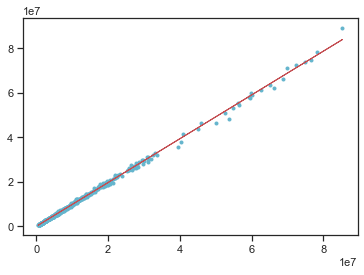

In [30]:
import matplotlib.pyplot as plt

y_array_regr = [regr1.coef_[0]*x+regr1.intercept_[0] for x in X_train]

plt.plot(X_train, Y_train, 'c.')
plt.plot(X_train, y_array_regr, 'r-', linewidth=1.0)
plt.show()

Прослеживается линейная зависимость

Предскажем значения тестовой выборки и оценим качество обученной модели:

In [39]:
predict1 = regr1.predict(X_test.reshape(-1, 1))

In [45]:
from sklearn.metrics import r2_score 

r_score_1 = r2_score(Y_test, predict1)

print(f"оценка R^2 для метода линейной регрессии: {r_score_1}")

оценка R^2 для метода линейной регрессии: 0.9978151637896605


Обученная модель предсказывает значения целевого признака достаточно точно.

### Градиентный бустинг

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

# Обучим модель Градиентного бустинга
regr2 = GradientBoostingRegressor(random_state=1).fit(X_train.reshape(-1, 1), Y_train)

In [42]:
predict2= regr2.predict(X_test.reshape(-1, 1))

In [44]:
r_score_2 = r2_score(Y_test, predict2)

print(f"оценка R^2 для метода градиентного бустинга: {r_score_2}")

оценка R^2 для метода градиентного бустинга: 0.9967589376657955


In [48]:
if abs(r_score_1-r_score_2) < 0.01:
        print("Оба метода предсказывают примерно одинаково")
elif r_score_1 < r_score_2:
    print(f"Первый метод ({r_score_1}) хуже второго ({r_score_2}])")
else:
    print(f"Первый метод ({r_score_1}) лучше второго ({r_score_2}])")

Оба метода предсказывают примерно одинаково


##  Вывод
В результате выполнения рубежного контроля были исследованы две модели, обученные разными методами, была произведена оценка предсказаний моделей, которая показала что оба метода одинаково хороши. Связанно это с тем что выбранные мной признаки сильно коррелируют между собой.